In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
target = ['Survived']
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare']

In [14]:
# change Sex column to float
df['Sex'] = df.apply(lambda row: int(row['Sex']=='male'),axis = 1)

In [18]:
# train_val_test split
df = df.dropna(subset = features+target)
x_tr,x_te,y_tr,y_te = train_test_split(df[features],df[target],
                                      test_size = 0.4,
                                      random_state = 0)
x_va,x_te,y_va,y_te = train_test_split(x_te,y_te,
                                      test_size = 0.5,
                                      random_state = 0)

In [19]:
x_tr

Pclass  Sex   Age  SibSp  Parch      Fare
165       3    1   9.0      0      2   20.5250
510       3    1  29.0      0      0    7.7500
278       3    1   7.0      4      1   29.1250
761       3    1  41.0      0      0    7.1250
130       3    1  33.0      0      0    7.8958
..      ...  ...   ...    ...    ...       ...
883       2    1  28.0      0      0   10.5000
238       2    1  19.0      0      0   10.5000
789       1    1  46.0      0      0   79.2000
704       3    1  26.0      1      0    7.8542
856       1    0  45.0      1      1  164.8667

[428 rows x 6 columns]

In [21]:
tr = DecisionTreeClassifier()
tr.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [24]:
tr.score(x_tr,y_tr)

0.9906542056074766

In [23]:
tr.score(x_va,y_va)

0.6853146853146853

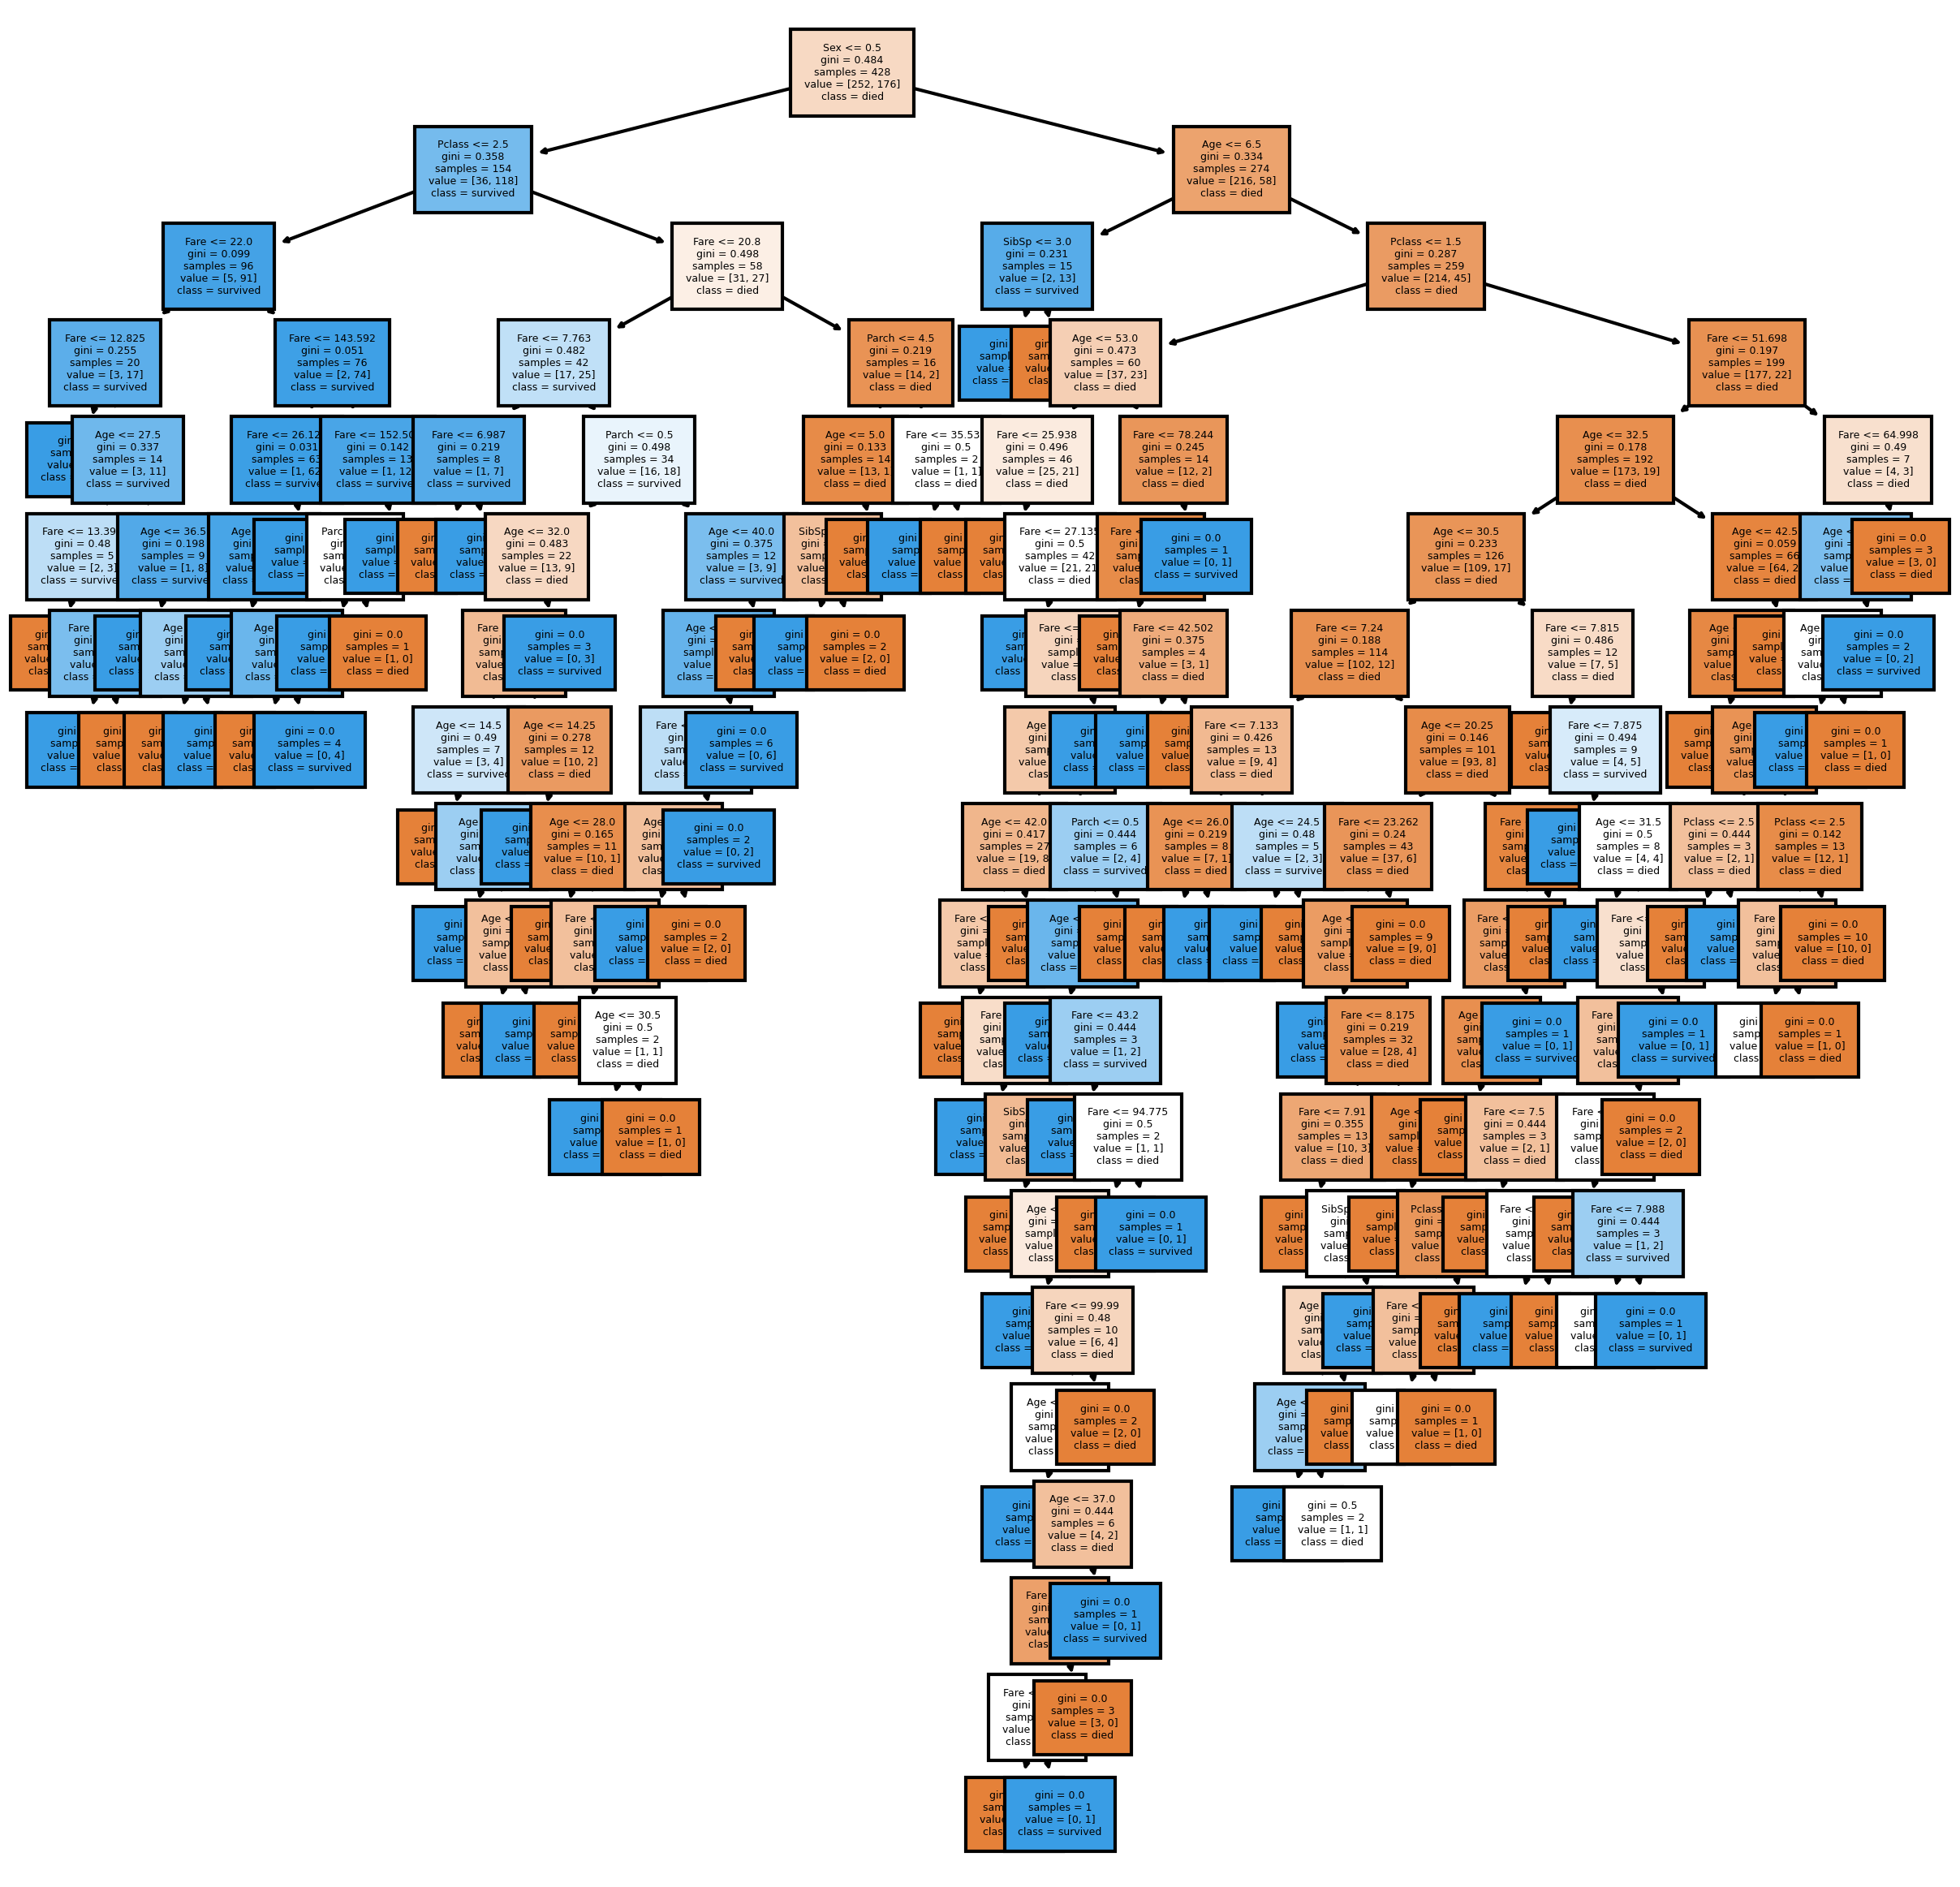

In [30]:
fig,ax=plt.subplots(figsize=(10,10),dpi=300)
plot_tree(tr,\
          feature_names = features,
          class_names = ['died','survived'],
          filled = True,
          fontsize = 3);